### **Ejercicio 1 (25%)**

1.  Elabore algorimo que permita hallar la moda de un grupo de números.  Cada número esta almacenado en un nodo doblemente ligado.
2.  Halle el costo computacional utilizando la Notación Big O.
3.  Grafique el costo computacional, en un rango de 0 a  3000.
4.  Realice el análisis del costo computacional.

### Supuestos necesarios.
1. Necesitamos una clase nodo que reciba un unico valor en este caso un número.
2. Los nodos serán almacenados en una lista doblemente ligada.
3. Para el calculo de la moda se tiene en cuenta.
   - El caso de una lista vacia. ( No hay moda.)
   - Una única moda en la LDL. (Caso estandar )
   - Mas de una única moda (Retorna un mensaje con el número de modas.)


### **Moda sobre nodos de una LDL** (Algoritmo)

In [ ]:
class Node:
    """
    Representa un nodo en una lista doblemente ligada.

    Args:
        valor: Contenido del nodo.
        next: Referencia al siguiente nodo en la lista.
        previous: Referencia al nodo anterior en la lista.
    """

    def __init__(self, value):
        self.value = value
        self.next = None
        self.previous = None

    @classmethod
    def create_valid_node(cls, value):
        """
        Crea una instancia de la clase Node validando que el valor sea numérico.

        Args:
            value: Valor a almacenar en el nodo. Debe ser de tipo int o float.

        Returns:
            Node: Nueva instancia de la clase con el valor proporcionado.

        Raises:
            TypeError: Si el valor no es numérico (int/float).

        Notas:
            1.) Este método centraliza la validación de tipo antes de crear un nodo.
            Favorece el principio de responsabilidad única (SRP) separando
            la validación del constructor.

            2.) Se lanza un mensaje informativo que nos indica cuando no se ha podido crear un nodo valido. No se lanzan 'raises' para evitar la interrumpción del programa, ni se utilizan logs para no depender de la instalación de librerias como loguru/logging.

            3. Bajo esta lógica todos los Nodos se 'crean', pero no todos serán validos para añadir a la LDL.

        """
        if not isinstance(value, (int, float)) or isinstance(value, bool):
            msg = f"Se esperaba un número (int o float), pero se recibió {type(value).__name__} con valor {value!r}. Este nodo no será añadido a la lista \n"
            return None, msg

        return cls(value), None


class DoublyLinkedList:
    def __init__(self):
        """Inicializa la cabecera, la cola y el tamaño de una lista doblemente enlazada.
        Por defecto, la lista comienza vacía.
        """

        self.head = None
        self.last = None
        self.size = 0

    def list_null(self):
        """verifica si la LDL está vacia.
        Nota: Si la cabecera está vacia no existen nodos en la LDL"""
        return self.head is None

    def insert_node_at_end(self, valid_node):
        """Permite insertar un nodo en la posición final de la LDL

        Args:
            value : Ya tratado en la clase Node.
        """
        # Nuevo nodo.
        new_node = valid_node

        # Si la lista está vacía, el nuevo nodo es el primero y último
        if self.list_null():
            self.head = self.last = new_node

        else:
            """
            Si la lista no se encuentra vacia debemos.
            1. Enlazar último nodo con el nuevo a través de su liga derecha.

            2. Enlazar el nuevo nodo, con el nodo que hasta entonces era el último,
               utilizando su liga izquierda.

            3. Asignar a la cola el nuevo nodo (Que ahora es el último).

            4. Incrementar el tamaño de la lista en una unidad"""
            self.last.next = new_node  # 1.
            new_node.previous = self.last  # 2.
            self.last = new_node  # 3.

        self.size = self.size + 1  # 4.

    def print_ldl(self):
        """
        Imprime todos los nodos de la lista doblemente ligada en orden desde la cabeza hasta el final.
        Muestra el número de posición y el valor contenido en cada nodo.
        """
        if self.list_null():
            print("La lista está vacía.")
            return

        current = self.head
        contador = 1
        while current:
            print(f"Nodo {contador}: {current.value}")
            current = current.next
            contador += 1

    def contar_frecuencias(self):
        """
        Recorre la LDL y crea otra LDL con pares (valor, frecuencia).

        Returns:
            DoublyLinkedList: lista auxiliar con las frecuencias asociadas a cada valor.

        Proceso para contar frecuencias:

        1. Se crea una nueva lista doblemente ligada vacía (llamada "lista_frec") que servirá
        como nuestra "tabla de frecuencias" contiene Nodos que son tuplas (valor, frecuencia)

        2. Se inicia un recorrido desde el primer nodo de la lista original (usando "current = self.head").

        3. Por cada nodo de la lista original, se busca si su valor ya existe en "lista_frec":
            - Caso 1: Si ya existe, se incrementa su contador (actualizamos la tupla (valor, frecuencia)).
            - Caso 2: Si no existe, se crea un nuevo nodo con la tupla (valor, 1) y se añade al final de "lista_frec".

        4. Se avanza al siguiente nodo de la lista original y se repite el proceso.

        5. Finalmente se retorna la lista de frecuencias.
        """
        lista_frec = DoublyLinkedList()  # 1
        current = self.head  # 2

        while current: 
            f = lista_frec.head
            encontrado = False

            while f:  # 3 (Notemos: value[0] = valor nodo, value[1] = frecuencia nodo)
                if f.value[0] == current.value:
                    f.value = (f.value[0], f.value[1] + 1)  # 3. (Caso1)
                    encontrado = True
                    break
                f = f.next

            if not encontrado:  # 3 (Caso 2)
                nuevo = Node((current.value, 1))
                lista_frec.insert_node_at_end(nuevo)

            current = current.next  # 4

        return lista_frec  # 5

    def frecuencia_maxima(self, lista_frec):
        """
        Busca la frecuencia máxima en la LDL de frecuencias.
        Args:
            lista_frec (DoublyLinkedList): lista auxiliar con (valor, frecuencia)
        Returns:
            int: frecuencia máxima encontrada
        
        Proceso: 
        1. Inicalizamos la frecuencia máxima en 1 aparición.
        
        2. Recorremos la LDL comparando cada valor de frecuencia con la frecuencia maxima actual.
        
        3. Si es mayor se sustituye max_freq por la frecuencia del nodo actual (current.value[1])
        
        4. Pasamos al nodo siguiente. 
        
        """
        max_freq = 1  # 1
        current = lista_frec.head
        while current: # 2
            if current.value[1] > max_freq:
                max_freq = current.value[1] # 3
            current = current.next # 4
        return max_freq

    def contar_modas(self, lista_frec, max_freq):
        """
        Cuenta cuántos valores tienen la frecuencia máxima.
        Args:
            lista_frec (DoublyLinkedList): lista de frecuencias
            max_freq (int): frecuencia máxima
        Returns:
            tuple: (cantidad_con_max_frecuencia, un_valor_con_dicha_frecuencia)
        """
        f = lista_frec.head
        count = 0
        moda = None
        while f:
            if f.value[1] == max_freq:
                count += 1
                moda = f.value[0]
            f = f.next
        return count, moda

    def get_mode(self):
        """
        Calcula la moda usando métodos auxiliares.

        Returns:
            str | int | float: resultado según los casos posibles.
        """
        if self.list_null():
            return "Lista vacía"

        lista_frec = self.contar_frecuencias()
        max_freq = self.frecuencia_maxima(lista_frec)
        count, moda = self.contar_modas(lista_frec, max_freq)

        if max_freq == 1:
            return "No hay moda"
        elif count == 1:
            return f"La moda es única y corresponde al valor de: {moda}"
        else:
            return f"Hay múltiples modas con frecuencia {max_freq}"

### **Ejecución básica de prueba del algoritmo anterior.**

In [27]:
# Ejemplo del funcionamiento del programa. Y control de exepciones. (Caso: multiples modas)

ldl = DoublyLinkedList()


for cada_value in [10, "Diez", False, "10", 11, 15, 25, 40, 20, 25, 10]:
    nodo, error = Node.create_valid_node(cada_value)
    if nodo is None:
        print(error)
    else:
        ldl.insert_node_at_end(valid_node=nodo)

ldl.print_ldl()
ldl.get_mode()


Se esperaba un número (int o float), pero se recibió str con valor 'Diez'. Este nodo no será añadido a la lista 

Se esperaba un número (int o float), pero se recibió bool con valor False. Este nodo no será añadido a la lista 

Se esperaba un número (int o float), pero se recibió str con valor '10'. Este nodo no será añadido a la lista 

Nodo 1: 10
Nodo 2: 11
Nodo 3: 15
Nodo 4: 25
Nodo 5: 40
Nodo 6: 20
Nodo 7: 25
Nodo 8: 10


'Hay múltiples modas con frecuencia 2'

### **Ejemplo con moda única**

In [28]:
ldl_2 = DoublyLinkedList()

for cada_value in [10, 11, 40, 20, 25, 10]:
    nodo, error = Node.create_valid_node(cada_value)
    if nodo is None:
        print(error)
    else:
        ldl_2.insert_node_at_end(valid_node=nodo)

ldl_2.print_ldl()
ldl_2.get_mode()

Nodo 1: 10
Nodo 2: 11
Nodo 3: 40
Nodo 4: 20
Nodo 5: 25
Nodo 6: 10


'La moda es única y corresponde al valor de: 10'

### **Ejemplo de ldl sin moda.**

In [29]:
ldl_3 = DoublyLinkedList()

for cada_value in [10, 11, 40, 20, 25]:
    nodo, error = Node.create_valid_node(cada_value)
    if nodo is None:
        print(error)
    else:
        ldl_3.insert_node_at_end(valid_node=nodo)

ldl_3.print_ldl()
ldl_3.get_mode()


Nodo 1: 10
Nodo 2: 11
Nodo 3: 40
Nodo 4: 20
Nodo 5: 25


'No hay moda'

###  Medición de tiempo y grafica

In [36]:
import time
import matplotlib.pyplot as plt

class ComplejidadMedidor:
    """
    Clase que encapsula el proceso de medición de tiempos de ejecución y graficación
    para el método `get_mode()` aplicado sobre una lista doblemente ligada (LDL).

    Esta clase permite:
    - Construir LDLs con tamaños crecientes.
    - Medir el tiempo de ejecución de cada caso.
    - Visualizar los resultados en una gráfica.
    """

    def __init__(self, tamaños=None):
        """
        Inicializa el medidor con un conjunto de tamaños a evaluar.

        Args:
            tamaños (list[int], opcional): Lista de tamaños de entrada (n) sobre los que se medirá el tiempo.
                                           Por defecto se usa [0, 300, 600, ..., 2700].
        """
        self.ns = tamaños if tamaños else list(range(0, 3001, 300))
        self.tiempos = []

    def medir_tiempo(self, n):
        """
        Mide el tiempo de ejecución del método `get_mode()` para una LDL con `n` nodos.

        Args:
            n (int): Número de nodos en la lista.

        Returns:
            float: Tiempo en segundos que tarda `get_mode()` en ejecutarse.
        """
        ldl = DoublyLinkedList()
        for i in range(n):
            nodo, _ = Node.create_valid_node(i % 50)  # Ciclos para simular frecuencias
            if nodo:
                ldl.insert_node_at_end(nodo)

        inicio = time.perf_counter()
        ldl.get_mode()
        fin = time.perf_counter()
        return fin - inicio

    def ejecutar_mediciones(self):
        """
        Ejecuta la medición de tiempos para todos los tamaños configurados en `self.ns`.
        Guarda los resultados en `self.tiempos`.
        """
        self.tiempos = [self.medir_tiempo(n) for n in self.ns]

    def graficar(self):
        """
        Genera una gráfica de los tiempos de ejecución medidos para cada tamaño n.
        """
        if not self.tiempos:
            self.ejecutar_mediciones()

        plt.figure(figsize=(10, 6))
        plt.plot(self.ns, self.tiempos, marker='o',label="Tiempo medido (versión O(n²))")
        plt.xlabel("Tamaño de la lista (n)")
        plt.ylabel("Tiempo de ejecución (s)")
        plt.title("Medición de complejidad get_mode()")
        plt.grid(True)
        plt.legend()
        plt.show()



### **Ejemplo de uso, generación grafica.**

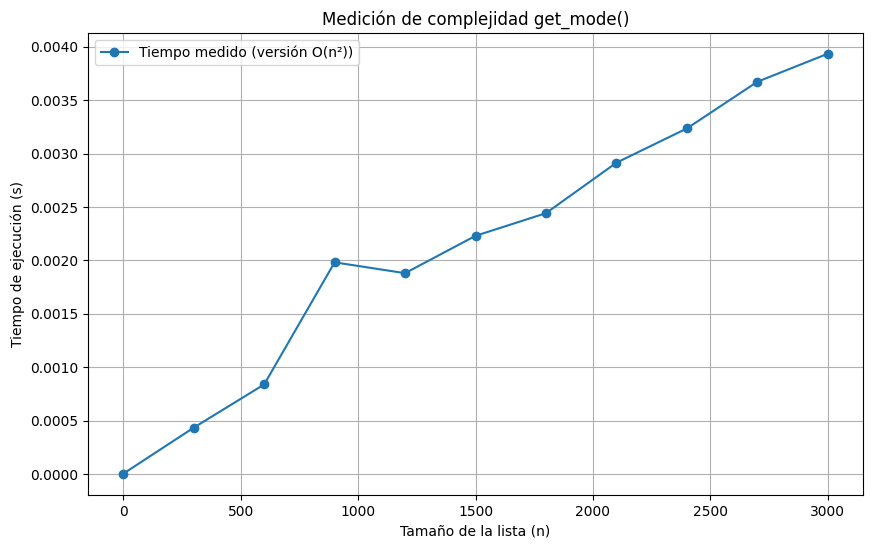

In [37]:
medidor = ComplejidadMedidor()
medidor.graficar()


#### **Análisis general del algoritmo en [Análisis del Punto 1](./analisis_punto1.MD)**

###  Generalidades sobre el gráfico

---

#### 1️. Tendencia general y fluctuaciones

Podemos notar una tendencia ascendente. Sin embargo, en diversas simulaciones pueden presentarse caídas que rompen el comportamiento puramente creciente de los intervalos.

Esto se debe a que incluso con 3000 operaciones, los tiempos de ejecución son infimos (menos de un segundo para todos el rango n de ejecución.) Estos resultan sensibles a perturbaciones propias del sistema operativo o del entorno de ejecución (procesos en segundo plano, administración del CPU, etc.).

---

#### 2️. Propuesta de mejora experimental

Teniendo en cuenta el comportamiento anterior, se propone una nueva simulación con:

- Un rango de prueba mucho más amplio: **de 0 a 1'000.000**, con pasos de **100000**.
- Intervalos más espaciados para reducir fluctuaciones y obtener una curva más estable y representativa del crecimiento real.
- Despues de varias pruebas podemos ver que el tiempo de graficación oscila entre **20** y **40s**
---


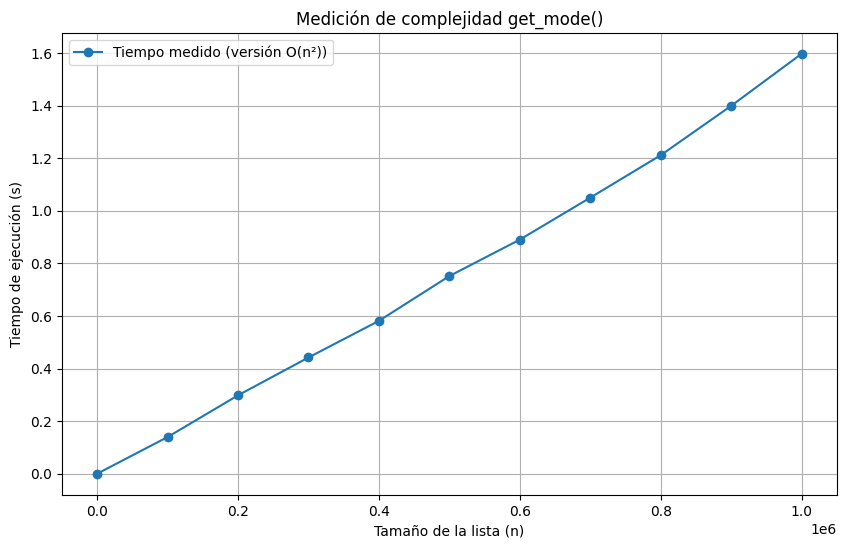

In [38]:
tamaños = [i for i in range(0, 1000001, 100000)]
medidor = ComplejidadMedidor(tamaños=tamaños)
medidor.graficar()